# XXXIV. LOCAL SEARCH ALGORITHMS 

### Local search Paradigm
Local search is a general heuristic design paradigm. At a higher level, you should think of it that we're always maintaining a candidate cut. And we just want to iteratively make it better and better via small, that is local, modifications.

#### Principles of Local search

![Local Search](images/23_LocalSearch.png)

![Local Search](images/24_LocalSearch.png)



### The Maximum Cut Problem

We're given, as input, an undirected graph g. And the responsibility of the algorithm is to output a cut that is a partition of the vertices into two non-empty sets, A and B, that maximizes the number of edges that have exactly one endpoint in each of the two groups of the partition.

Sadly, unlike the minimum cut problem which we saw in part one is computationally tractable, the maximum cut problem, in general, is computationally intractable, it's NP-complete. More precisely, the decision version of the question where you're given a graph you want to know whether or not there exists a cut that cuts at least a certain number of edges, that's an NP-complete problem. There's no polynomial time algorithm for it unless P equals NP. Like most NP-complete problems, there are some computational tractable special cases. For example the case of bipartite graphs.

One definition of a bipartite graph is a graph in which there exists a cut, so that every single edge is crossing it. And then obviously, that would be the maximum cut of the graph.

A slick way to solve this problem in linear time is to use breadth-first search. You just root the breadth-first search at a arbitrary vertex of the graph. You draw for your breadth-first search tree. You put the even layers as one of your groups A. You take the odd layers and make it the other group B. This will have no crossing edges, if and only if, the graph is bipartite.


![The Maximum Cut Problem](images/26_MaxCutAlgo.png)


To succinctly state the algorithm I'm going to need a little bit of notation. So imagine that we have some undirected graph and we're trying to approximate the maximum cut. And suppose we have some current candidate cut A,B. Some of the vertices are in A the rest are in B. Now focus on some arbitrary vertex $v$, $v$ can be an A or B I don't care. There is some incident edges to this vertex $v$, in the graph on the right, I've shown you a vertex $v$, it has degree five, five incident edges. Now, some of these edges are crossing the cut, some of the edges are not. So I'm going to use the notation $C_v (A, B)$ to denote the number of v's incident edges that are crossing the cut. And $d_v (A, B)$  to denote the edges, the number of edges which are not crossing the cut. So in the picture that I've drawn, $C_v$  would be equal to two, $d_v$ would be equal to three.

Here then is the local search algorithm for maximum cut. In step one, we just begin with an arbitrary cut of the graph, so we just somehow, I don't care how, put some of the vertices in A, some of the vertices in B.

Now, we just iteratively try to make the cut that we're working with better until we don't see any easy way to improve it further.

So what's a principled way to take a given cut and make it better? Well, let's just focus on very simple modifications. Let's suppose the only thing we're allowed to do is take a vertex from one of the two groups say, from group A, and move it to group b.

 Well here are the two ramifications of moving v from A to B. So, first of all, the two edges incident to v that used to be crossing the cut, they no longer cross the cut. When we put v over on the right hand side the two edges who's other end points are in B those edges get sucked in internally to B. They are no longer crossing the cut. On the other hand, the good news is, is that the three edges incident to v with the other endpoint in A they used to be internal to the group A, but when we bring v over to the right hand side to the group B, now those three edges cross the cut. So we lost two edges from the cut but we gained three so that's a net improvement of one more edge crossing the cut. In general this argument shows that for any vertex so that the number of edges incident to it that are not crossing the cut, if that's bigger than the number which are crossing the cut incident to it, Then switching sides with that vertex will improve the cut. And the improvement is exactly the difference between the two quantities $d_v$ and $C_v$
 
 If we find ourself with a cut such that there's no vertex switch that improves the cut, that is if $d_v (A, B)$ is at most $C_v (A, B)$ for every single vertex $v$. Then we stop and we just return to the cut that we ended up with.



Before A: ['a', 'c', 'd', 'g', 'h', 'i', 'j', 'k', 'n', 'o', 'q', 's'], B: ['b', 'e', 'f', 'l', 'm', 'p', 'r', 't']
After A: ['a', 'c', 'g', 'i', 'k', 'n', 'o', 'q', 's', 'm'], B: ['b', 'e', 'f', 'l', 'p', 'r', 't', 'd', 'j', 'h']
Number of edges in Max-Cut: 17


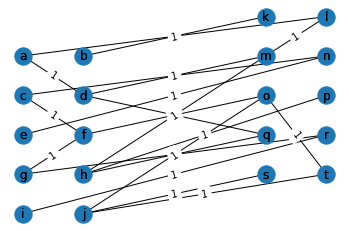

In [51]:
import networkx as nx
import random

def Maximum_Cut_Problem(G):
    # arbitrary cut into sets A(True) and B(False)
    nodes = list(G.nodes)
    edges = list(G.edges)
    crossing_edges = []
    A = []
    B = []
    for node in nodes:
        random_choice = random.choice([True, False])
        if random_choice == True:
            A.append(node)
        else:
            B.append(node)
    print("Before A: {}, B: {}".format(A, B))
    for edge in edges:
        if (edge[0] in A and edge[1] in B) or  (edge[1] in A and edge[0] in B):
            crossing_edges.append(edge)
    stopping = False
    while stopping != True:
        #random_edge = randrange(len(crossing_edges))  
        random_node = [random.choice([1, 0]) for _ in range(len(crossing_edges))]
        check_nodes = [crossing_edges[n][random_node[n]] for n in range(len(crossing_edges))]
        issue_stop = True
        for check_node in check_nodes:
            check_node_truth = None
            if check_node in A:
                check_node_truth = True
            else:
                check_node_truth = False
            expected_crossing_truth = not check_node_truth
            adjacent_check_nodes = list(G.adj[check_node])
            d_v_nodes = []
            d_v = 0
            C_v = 0
            for n in adjacent_check_nodes:
                #print("check_node: {}, n: {}".format(check_node, n))
                if expected_crossing_truth == True:
                    if n in A:
                        C_v += 1
                    else:
                        d_v +=1
                        d_v_nodes.append(n)
                else:
                    if n in B:
                        C_v += 1
                    else:
                        d_v +=1
                        d_v_nodes.append(n)
            if C_v < d_v:
                #print("Before A: {}, B: {}, check_node: {}, C_v: {}, d_v: {}".format(A, B, check_node, C_v, d_v))
                #print("Before crossing_edges: {}".format(crossing_edges))
                issue_stop = False
                if check_node_truth == True:
                    A.remove(check_node)
                    B.append(check_node)
                    for edge in crossing_edges:
                        if check_node in edge:
                            crossing_edges.remove(edge)
                    for new_node in d_v_nodes:
                        crossing_edges.append((check_node, new_node))
                else:
                    B.remove(check_node)
                    A.append(check_node)
                    for edge in crossing_edges:
                        if check_node in edge:
                            crossing_edges.remove(edge)
                        
                    for new_node in d_v_nodes:
                        crossing_edges.append((check_node, new_node))
                #print("After A: {}, B: {}".format(A, B))
                #print("After crossing_edges: {}".format(crossing_edges))
        #print(issue_stop)
        if issue_stop == True:
            stopping = True 
    print("After A: {}, B: {}\nNumber of edges in Max-Cut: {}".format(A, B, len(crossing_edges)))
    
        
                
    

G = nx.Graph()
for i,j in zip(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't'],[(5, 25), (10, 25), (5, 20), (10, 20), (5, 15), (10, 15), (5, 10), (10, 10), (5, 5), (10, 5),   (25, 30), (30, 30), (25, 25), (30, 25), (25, 20), (30, 20), (25, 15), (30, 15), (25, 10), (30, 10)]):
    G.add_node(i, pos=j)
G.add_weighted_edges_from([('a', 'd', 1), ('b', 'k', 1), ('d', 'm', 1), ('c', 'n', 1), ('d', 'q', 1), ('c', 'f', 1), ('a', 'l', 1), ('l', 'm', 1), ('e', 'n', 1), ('m', 'h', 1), ('o', 'f', 1), ('h', 'p', 1), ('h', 'q', 1), ('o', 'j', 1), ('o', 't', 1), ('g', 'f', 1), ('g', 'r', 1), ('r', 'i', 1), ('j', 't', 1), ('s', 'j', 1)])
pos = nx.get_node_attributes(G, 'pos')
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw_networkx_labels(G,pos=pos)
nx.draw(G, pos, with_labels = True)
Maximum_Cut_Problem(G)    
    

Before A: ['c'], B: ['a', 'b', 'd']
After A: ['c'], B: ['a', 'b', 'd']
Number of edges in Max-Cut: 2


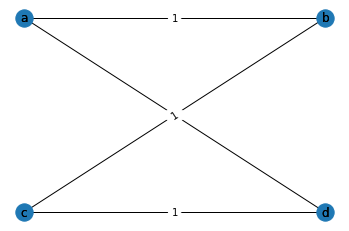

In [52]:
G = nx.Graph()
for i,j in zip(['a', 'b', 'c', 'd'],[(5, 25), (10, 25), (5, 20), (10, 20)]):
    G.add_node(i, pos=j)
G.add_weighted_edges_from([('a', 'b', 1), ('b', 'c', 1), ('d', 'a', 1), ('c', 'd', 1)])
pos = nx.get_node_attributes(G, 'pos')
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw_networkx_labels(G,pos=pos)
nx.draw(G, pos, with_labels = True)
Maximum_Cut_Problem(G)    


### 2-SAT
Input: n Boolean variables $x_1$, $x_2$, ..., $x_n$  (can be set to True or False)<br>
m clauseses of 2 literal each<br>

eg:  $(x_1 ∨ x_2)$ ^ $(¬x_1 ∨ x_3)$ ^ $(x_3 ∨ x_4)$ ^  $(¬x_2 ∨ ¬x_4) $

output: "yes" if there is an assignment that simultaneously satisfies every dataset, "no" otherwise

eg:  "yes", via <br>
$x_1$ = $x_3$ = True <br>
$x_2$ = $x_4$ = False

### Papadimitriou's 2-SAT Algorithm

![Papadimitriou's 2-SAT Algorithm](images/25_Papadimitrious_2_SAT_Algorithm.png)




In [90]:
import math
import random
from random import randrange



def satisfy(x, clauses):
    truth_clauses = []
    for c in clauses:
        if c[0] >= 0:
            x1 = x[c[0]-1]
        else:
            x1 = not x[-c[0]-1]
        if c[1] >= 0:
            x2 = x[c[1]-1]
        else:
            x2 = not x[-c[1]-1]
        truth_clauses.append(x1 or x2)
    return truth_clauses
    
    

    
def Papadimitrious_2SAT_Algorithm(parameters_count, clause_count, clauses):
    truth = False
    for _ in range(int(math.log2(parameters_count))):
        x = [random.choice([1, 0]) for _ in range(parameters_count)]
        for _ in range(2*(parameters_count**2)):
            truth_clauses = satisfy(x, clauses)
            if 0 not in truth_clauses:
                truth = True
                break
            while True:
                random_choice = randrange(clause_count)
                if truth_clauses[random_choice] == 1:
                        continue
                var_choice = random.choice([1, 0])
                if var_choice == 0:
                    x[abs(clauses[random_choice][0])-1] = not x[abs(clauses[random_choice][0])-1]
                else:
                    x[abs(clauses[random_choice][1])-1] = not x[abs(clauses[random_choice][1])-1]
                break    
        if truth == True:
            break
    print("x: {}".format(x))
    return truth
        
            
        
Papadimitrious_2SAT_Algorithm(4, 4, [[1, 2], [-1, 3], [3, 4], [-2, -4]])


x: [True, 0, True, 0]


True

### Challenge Problem

In this assignment you will implement one or more algorithms for the 2SAT problem. Here are 6 different 2SAT instances:

2sat1.txt <br>
2sat2.txt <br>
2sat3.txt <br>
2sat4.txt <br>
2sat5.txt <br>
2sat6.txt <br>

The file format is as follows. In each instance, the number of variables and the number of clauses is the same, and this number is specified on the first line of the file. Each subsequent line specifies a clause via its two literals, with a number denoting the variable and a "-" sign denoting logical "not". For example, the second line of the first data file is "-16808 75250", which indicates the clause ¬x16808∨x75250.

Your task is to determine which of the 6 instances are satisfiable, and which are unsatisfiable. In the box below, enter a 6-bit string, where the ith bit should be 1 if the ith instance is satisfiable, and 0 otherwise. For example, if you think that the first 3 instances are satisfiable and the last 3 are not, then you should enter the string 111000 in the box below.

DISCUSSION: This assignment is deliberately open-ended, and you can implement whichever 2SAT algorithm you want. For example, 2SAT reduces to computing the strongly connected components of a suitable graph (with two vertices per variable and two directed edges per clause, you should think through the details). This might be an especially attractive option for those of you who coded up an SCC algorithm in Part 2 of this specialization. Alternatively, you can use Papadimitriou's randomized local search algorithm. (The algorithm from lecture is probably too slow as stated, so you might want to make one or more simple modifications to it --- even if this means breaking the analysis given in lecture --- to ensure that it runs in a reasonable amount of time.) A third approach is via backtracking. In lecture we mentioned this approach only in passing; see Chapter 9 of the Dasgupta-Papadimitriou-Vazirani book, for example, for more details.

# XXXV. THE WIDER WORLD OF ALGORITHMS 

### Stable Matching 
### Gale-Shapley Proposal Algorithm
### Bi-Partite Matchings
### Maximum Flow Problem
### Selfish Flow
### Braess's Paradox
### Linear Programming , Convex Programming ,  Integer Programming 
### Geometric Algorithm - eg. Clustering